In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [2]:
hr=pd.read_csv('HR_comma_sep.csv')

In [3]:
hr=pd.get_dummies(hr,drop_first=True)
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [4]:
X=hr.drop('left',axis=1)
y=hr['left']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [6]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=23)

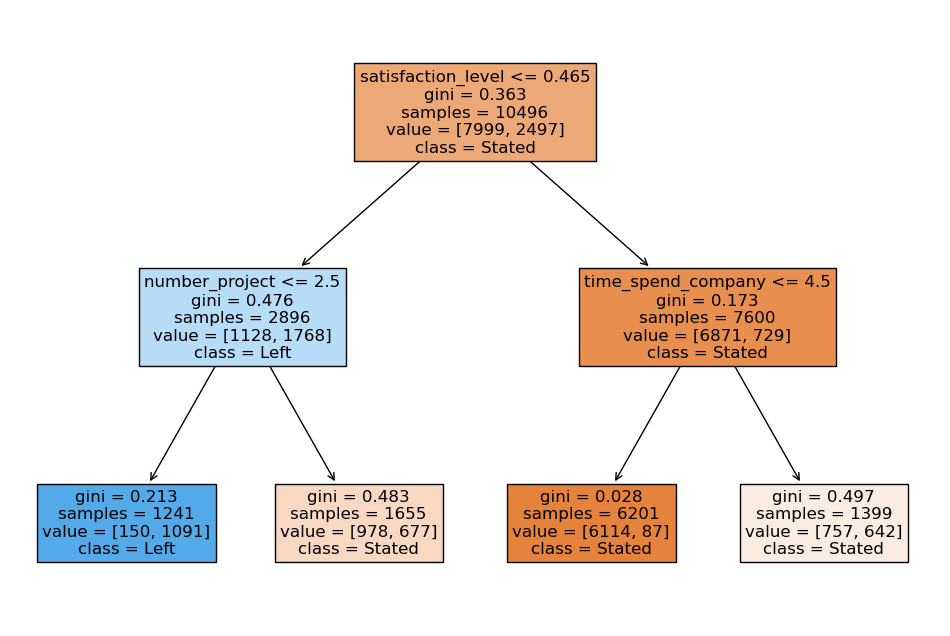

In [7]:
plt.figure(figsize=(12,8))
plot_tree(dtc,feature_names=X_train.columns,class_names=['Stated','Left'],filled=True,fontsize=12)
plt.show()

In [8]:
y_pred=dtc.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [9]:
y_pred_prob=dtc.predict_proba(X_test)[:,1]
y_pred_prob

array([0.01403   , 0.87912973, 0.01403   , ..., 0.01403   , 0.01403   ,
       0.45889921])

In [10]:
log_loss(y_test,y_pred_prob)

0.29562613083685063

# grid search

In [11]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [12]:
dtc=DecisionTreeClassifier(random_state=23)

In [13]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [14]:
params={'max_depth':[2,3,4,5,6,None]}

In [15]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [16]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='neg_log_loss')

In [17]:
gcv.best_params_

{'max_depth': 6}

In [18]:
gcv.best_score_

-0.11458681615740332

In [19]:
best_model=gcv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=6, random_state=23)

In [20]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,satisfaction_level,0.531650
1,last_evaluation,0.144790
2,number_project,0.100018
3,average_montly_hours,0.070362
4,time_spend_company,0.153061
5,Work_accident,0.000000
6,promotion_last_5years,0.000000
7,Department_RandD,0.000000
8,Department_accounting,0.000000
9,Department_hr,0.000000


In [21]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
15,Department_technical,0.000120
3,average_montly_hours,0.070362
2,number_project,0.100018
1,last_evaluation,0.144790
4,time_spend_company,0.153061
0,satisfaction_level,0.531650


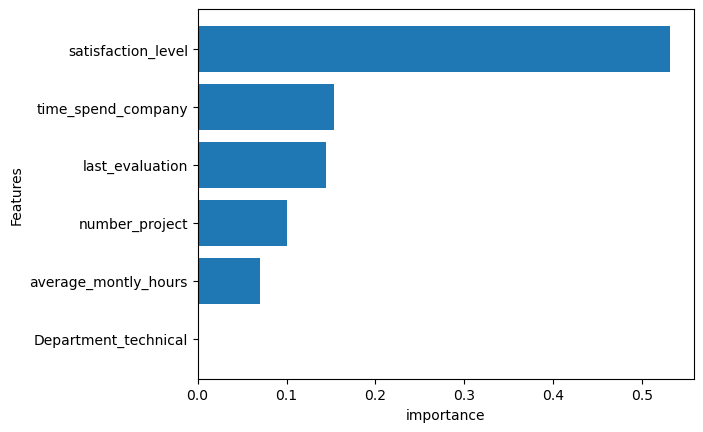

In [22]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()